#Ejemplo 4: Predicción de la inversión en un coche
---



**Objetivo y comprensión del problema**

El objetivo de este problema es predecir cuánto una persona se gastará en un coche.

Para ello, se utilizará un conjunto de datos que contiene:


*   Edad
*   Género
*   Media de millas por día
*   Deuda
*   Salario mensual




## Paso 1: Gestión de los datos




Para la configuración de las bibliotecas a importar, se incluye Keras y el conjunto de datos que ya viene incluido.

In [0]:
import keras
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline


**1.1-Carga de datos**

En este caso, los datos están disponibles como un CSV que se carga desde un directorio.

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Verificar dónde están nuestros datos.

In [117]:
!ls "/content/drive/My Drive"

 2.2-corto.docx
 2.2-corto.docx.gdoc
 273-profesor-joalvare-participacion.xls
 395-profesor-joalvare-participacion.xls
 395-profesor-joalvare-participacion.xls.gsheet
'3 way PIA-2018-4971 - TBC - BRTE - UC3M.docx'
'AA0 Robo Journalism'
'Alerts System Project_RTVE_UCIII_EBU'
 AMASS-INFINEON-OCT-2016.gdoc
 ANECA
 API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10399837.csv
 API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_10399733.csv
'Archivos de Prueba TTL'
 Asturias.gmap
'Attendace 1º cuatrimestre 2018-2019.gsheet'
 Attendance.gsheet
 BLOCKCHAIN-EXTERNO
 books
 Borrador-Infraestructura-Hojas-de-Cálculo.gdoc
 CalendarioLaboral2015.pdf
 Call-Visiting-Draft.gdoc
 CAMINO
 CCII
'Celtic-Plus IoD'
'Certif Blockchain Alastria Developer'
'Certif Blockchain UNIR Alastria CCII'
 ChemaJuanmi
'Colab Notebooks'
'Consejo departamento.gsheet'
'Consulting proposal.gslides'
 Copyright-issues-Inf.X-Semana-3.gsheet
'Course Evaluation.gform'
 courses
'CRYSTAL-IoS Domains: Knowledge Management and System KPIs.gform'
'CRYSTAL-IoS Dom

* Cargar los datos en un dataset.

In [0]:
dataset=np.loadtxt("/content/drive/My Drive/Colab Notebooks/data/cars.csv", delimiter=",")

* Se cargan 963 tuplas.

In [119]:
print (len(dataset))


963


**1.2-Visualización de los datos**

*   Se puede comprobar la forma que tienen nuestros datos. En este caso, 963 instancias con 6 valores.


In [120]:
dataset.shape


(963, 6)

**1.3-Codificar los datos**

En este caso se asegura que los datos son todos numéricos.

Se deben escalar los datos para que el aprendizaje funcione correctamente.



*   Las 5 primeras columnas corresponde a las variables.
*   La 6 columna es el valor a predecir.
*   Se realiza un escalado entre -1 y 1 para la variable a predecir, Y.
*   Se normalizan los valores tanto de X como de Y con la función Min/Max.



In [121]:
from sklearn.preprocessing import MinMaxScaler
X=dataset[:,0:5]
Y=dataset[:,5]
#FIXME: Test sin escalar los datos
#xscale=X
#yscale=Y
Y=np.reshape(Y, (-1,1))
scaler = MinMaxScaler()
print(scaler.fit(X))
print(scaler.fit(Y))
xscale=scaler.transform(X)
yscale=scaler.transform(Y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [122]:
print (xscale)

[[-0.01604024 -0.01699178 -0.01621015 -0.01699178  0.1223068 ]
 [-0.0161082  -0.01699178 -0.01607422 -0.01699178  0.07398219]
 [-0.01597227 -0.01695779 -0.01502073  1.39590838  0.194216  ]
 ...
 [-0.01604024 -0.01695779 -0.01604024  0.29946306  0.07544349]
 [-0.0152926  -0.01699178 -0.01600625  1.72782573  0.27910691]
 [-0.01539455 -0.01695779 -0.01648202  0.10993679  0.20070686]]


In [123]:
print (yscale)

[[4.07802624e-03]
 [4.39067491e-02]
 [9.26187725e-01]
 [9.43247468e-01]
 [1.33827228e-01]
 [5.44416502e-02]
 [2.72548087e-01]
 [0.00000000e+00]
 [7.64527968e-01]
 [8.84150071e-01]
 [4.62584109e-01]
 [6.95167539e-01]
 [2.42982397e-01]
 [9.16536396e-02]
 [1.36987698e-01]
 [5.94882077e-01]
 [7.59668321e-01]
 [3.32291171e-01]
 [8.12206892e-03]
 [1.28151974e-01]
 [1.43852375e-01]
 [1.60062530e-02]
 [1.95847210e-01]
 [8.21620336e-01]
 [7.58852715e-01]
 [3.19887175e-01]
 [1.05281044e-01]
 [1.60470332e-01]
 [7.45938966e-01]
 [8.32359138e-01]
 [9.55175695e-01]
 [5.56480663e-01]
 [9.17216067e-02]
 [8.45986543e-01]
 [3.75926052e-01]
 [1.31720247e-01]
 [3.74838578e-01]
 [9.51539455e-03]
 [8.30897845e-02]
 [2.41317202e-01]
 [4.94256780e-01]
 [5.34561272e-02]
 [8.05070346e-02]
 [3.37116835e-02]
 [1.84428736e-01]
 [1.00387412e-01]
 [6.05586896e-02]
 [5.73438456e-01]
 [6.74267654e-01]
 [2.23000068e-01]
 [9.23570992e-01]
 [4.10555291e-01]
 [3.49350914e-01]
 [5.02548766e-01]
 [1.16495616e-01]
 [1.139128

**1.4-Seleccionar los datos**

En este caso, los datos ya están preparados y divididos apropiadamente al descargar el dataset.





In [0]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

## Paso 2: Arquitectura e implementación de nuestra red


1.   La entrada de nuestra red será una capa con 5 nodos de acuerdo a las dimensiones de nuestros datos.
2.   La función de activación o filtrado de esta primera capa será relu. Esta capa es "densa" o "totalmente conectada"
3.   La función de activación en la capa de salida será "linear". Es decir, si se compra o no se compra el coche.
4. La función de pérdida será  **mse**.
5. La función de optimización **adam**. 
6. Métricas: en este caso se selecciona sólo la precisión.



In [125]:
network = models.Sequential()
network.add(layers.Dense(4, input_dim=5, kernel_initializer='normal', activation='sigmoid'))
network.add(layers.Dense(2, activation='relu'))
network.add(layers.Dense(1))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 3         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

## Paso 3:  Entrenamiento



En este caso el entrenamiento se realiza utilizando el 80% de los datos y el 20% para el test (validation_split)

In [127]:
history = network.fit(X_train, y_train, epochs=60, batch_size=50,  verbose=1, validation_split=0.2)

Train on 577 samples, validate on 145 samples
Epoch 1/60
577/577 [==============================] - 1s 1ms/step - loss: 1.6002 - acc: 0.0000e+00 - val_loss: 1.5000 - val_acc: 0.0000e+00
Epoch 2/60
577/577 [==============================] - 0s 35us/step - loss: 1.3501 - acc: 0.0017 - val_loss: 1.2609 - val_acc: 0.0000e+00
Epoch 3/60
577/577 [==============================] - 0s 33us/step - loss: 1.1313 - acc: 0.0017 - val_loss: 1.0571 - val_acc: 0.0000e+00
Epoch 4/60
577/577 [==============================] - 0s 31us/step - loss: 0.9480 - acc: 0.0017 - val_loss: 0.8874 - val_acc: 0.0000e+00
Epoch 5/60
577/577 [==============================] - 0s 32us/step - loss: 0.7952 - acc: 0.0017 - val_loss: 0.7481 - val_acc: 0.0000e+00
Epoch 6/60
577/577 [==============================] - 0s 32us/step - loss: 0.6704 - acc: 0.0017 - val_loss: 0.6323 - val_acc: 0.0000e+00
Epoch 7/60
577/577 [==============================] - 0s 37us/step - loss: 0.5671 - acc: 0.0017 - val_loss: 0.5371 - val_acc: 0.0

*FIXME: As you can see, we have specified 150 epochs for our model. This means that we are essentially training our model over 150 forward and backward passes, with the expectation that our loss will decrease with each epoch, meaning that our model is predicting the value of y more accurately as we continue to train the model.*



In [128]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


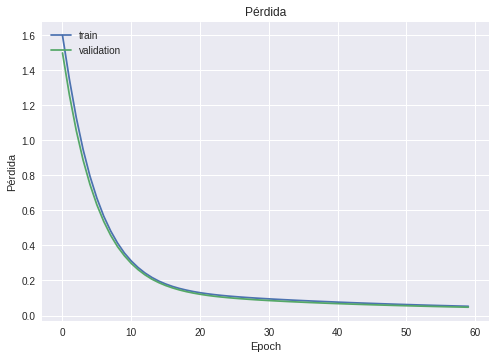

In [131]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

*FIXME: Both the training and validation loss decrease in an exponential fashion as the number of epochs is increased, suggesting that the model gains a high degree of accuracy as our epochs (or number of forward and backward passes) is increased.*

## Paso 4:  Test y Predicción

En este caso, se va a predecir una nueva instancia. Para ello, habrá que:
1. Escalar los valores de entrada.
2. Realizar la predicción.
3. Invertir el valor de salida.

In [130]:
instance = np.array([[40, 0, 26, 9000, 8000]])
xscale_new=scaler.transform(instance)
y_new = network.predict(xscale_new)
print("Valor: ", scaler.inverse_transform(y_new))

Valor:  [[11362.033]]


#Tareas

1.   Cambiar el tipo de la función de pérdida y ver cómo afecta al resultado.
2.   Cambiar la función de optimización y ver cómo afecta al resultado.